In [1]:
import sympy
from sympy import Matrix, Rational, sqrt, symbols, zeros
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

# Mathematics for Machine Learning

## Session 06: Dimensions

## Gerhard Jäger

### November 7, 2024

## The complete solution to a system of equations

Back to our example from last time:

$$
\begin{aligned}
A & =
\begin{bmatrix}
1 & 2& 3\\
2 & 4 & 3\\
3 & 6 & 1
\end{bmatrix}\\[1em]
\mathbf b &= \begin{bmatrix} 4\\ 5\\ 4\end{bmatrix}\\[1em]
A\mathbf x &= \mathbf b
\end{aligned}
$$



- first step: apply Gauss-Jordan elimination to the augmented matrix

$$
\left[\begin{array}{rrr|r}
1 & 2 & 3 & 4\\
2 & 4 & 3 & 5\\
3 & 6 & 1 & 4
\end{array}\right]\\
\left[\begin{array}{rrr|r}
1 & 2 & 3 & 4\\
0 & 0 & -3 & -3\\
0 & 0 & -8 & -8
\end{array}\right]\\
\left[\begin{array}{rrr|r}
1 & 2 & 3 & 4\\
0 & 0 & -3 & -3\\
0 & 0 & 0 & 0
\end{array}\right]\\
\left[\begin{array}{rrr|r}
1 & 2 & 0 & 1\\
0 & 0 & -3 & -3\\
0 & 0 & 0 & 0
\end{array}\right]\\
\left[\begin{array}{rrr|r}
1 & 2 & 0 & 1\\
0 & 0 & 1 & 1\\
0 & 0 & 0 & 0
\end{array}\right]\\
$$

- second step: find canonical solution by setting the slots corresponding to the free columns to 0 and solving via substitution

$$
\mathbf x_c = \begin{bmatrix}1\\0\\1\end{bmatrix}
$$

- third step: find the null space of $A$

$$
\mathbf x_0 = \begin{bmatrix}-2\\1\\0\end{bmatrix}
$$

The complete solution is the set of vectors $$\mathbf x_c + \alpha~\mathbf x_0,$$ for any real number $\alpha$.

## Rank of a matrix

Geometrically speaking, the **rank** of a matrix is the number of dimensions covered by its column space.



## examples of an invertable and a non-invertable matrix in 3d

$$
\begin{aligned}
A &= 
\begin{bmatrix}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & 8
\end{bmatrix}\\[1em]
A^{-1} &=
\begin{bmatrix}
\frac{5}{63} & - \frac{22}{63} & \frac{1}{9}\\- \frac{11}{63} & - \frac{2}{63} & \frac{1}{18}\\\frac{1}{9} & \frac{1}{9} & \frac{1}{18}
\end{bmatrix}\\[1em]
B &= 
\begin{bmatrix}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & -10
\end{bmatrix}\\[1em]
B^{-1}& \text{ is undefined}
\end{aligned}
$$

<IPython.core.display.Javascript object>


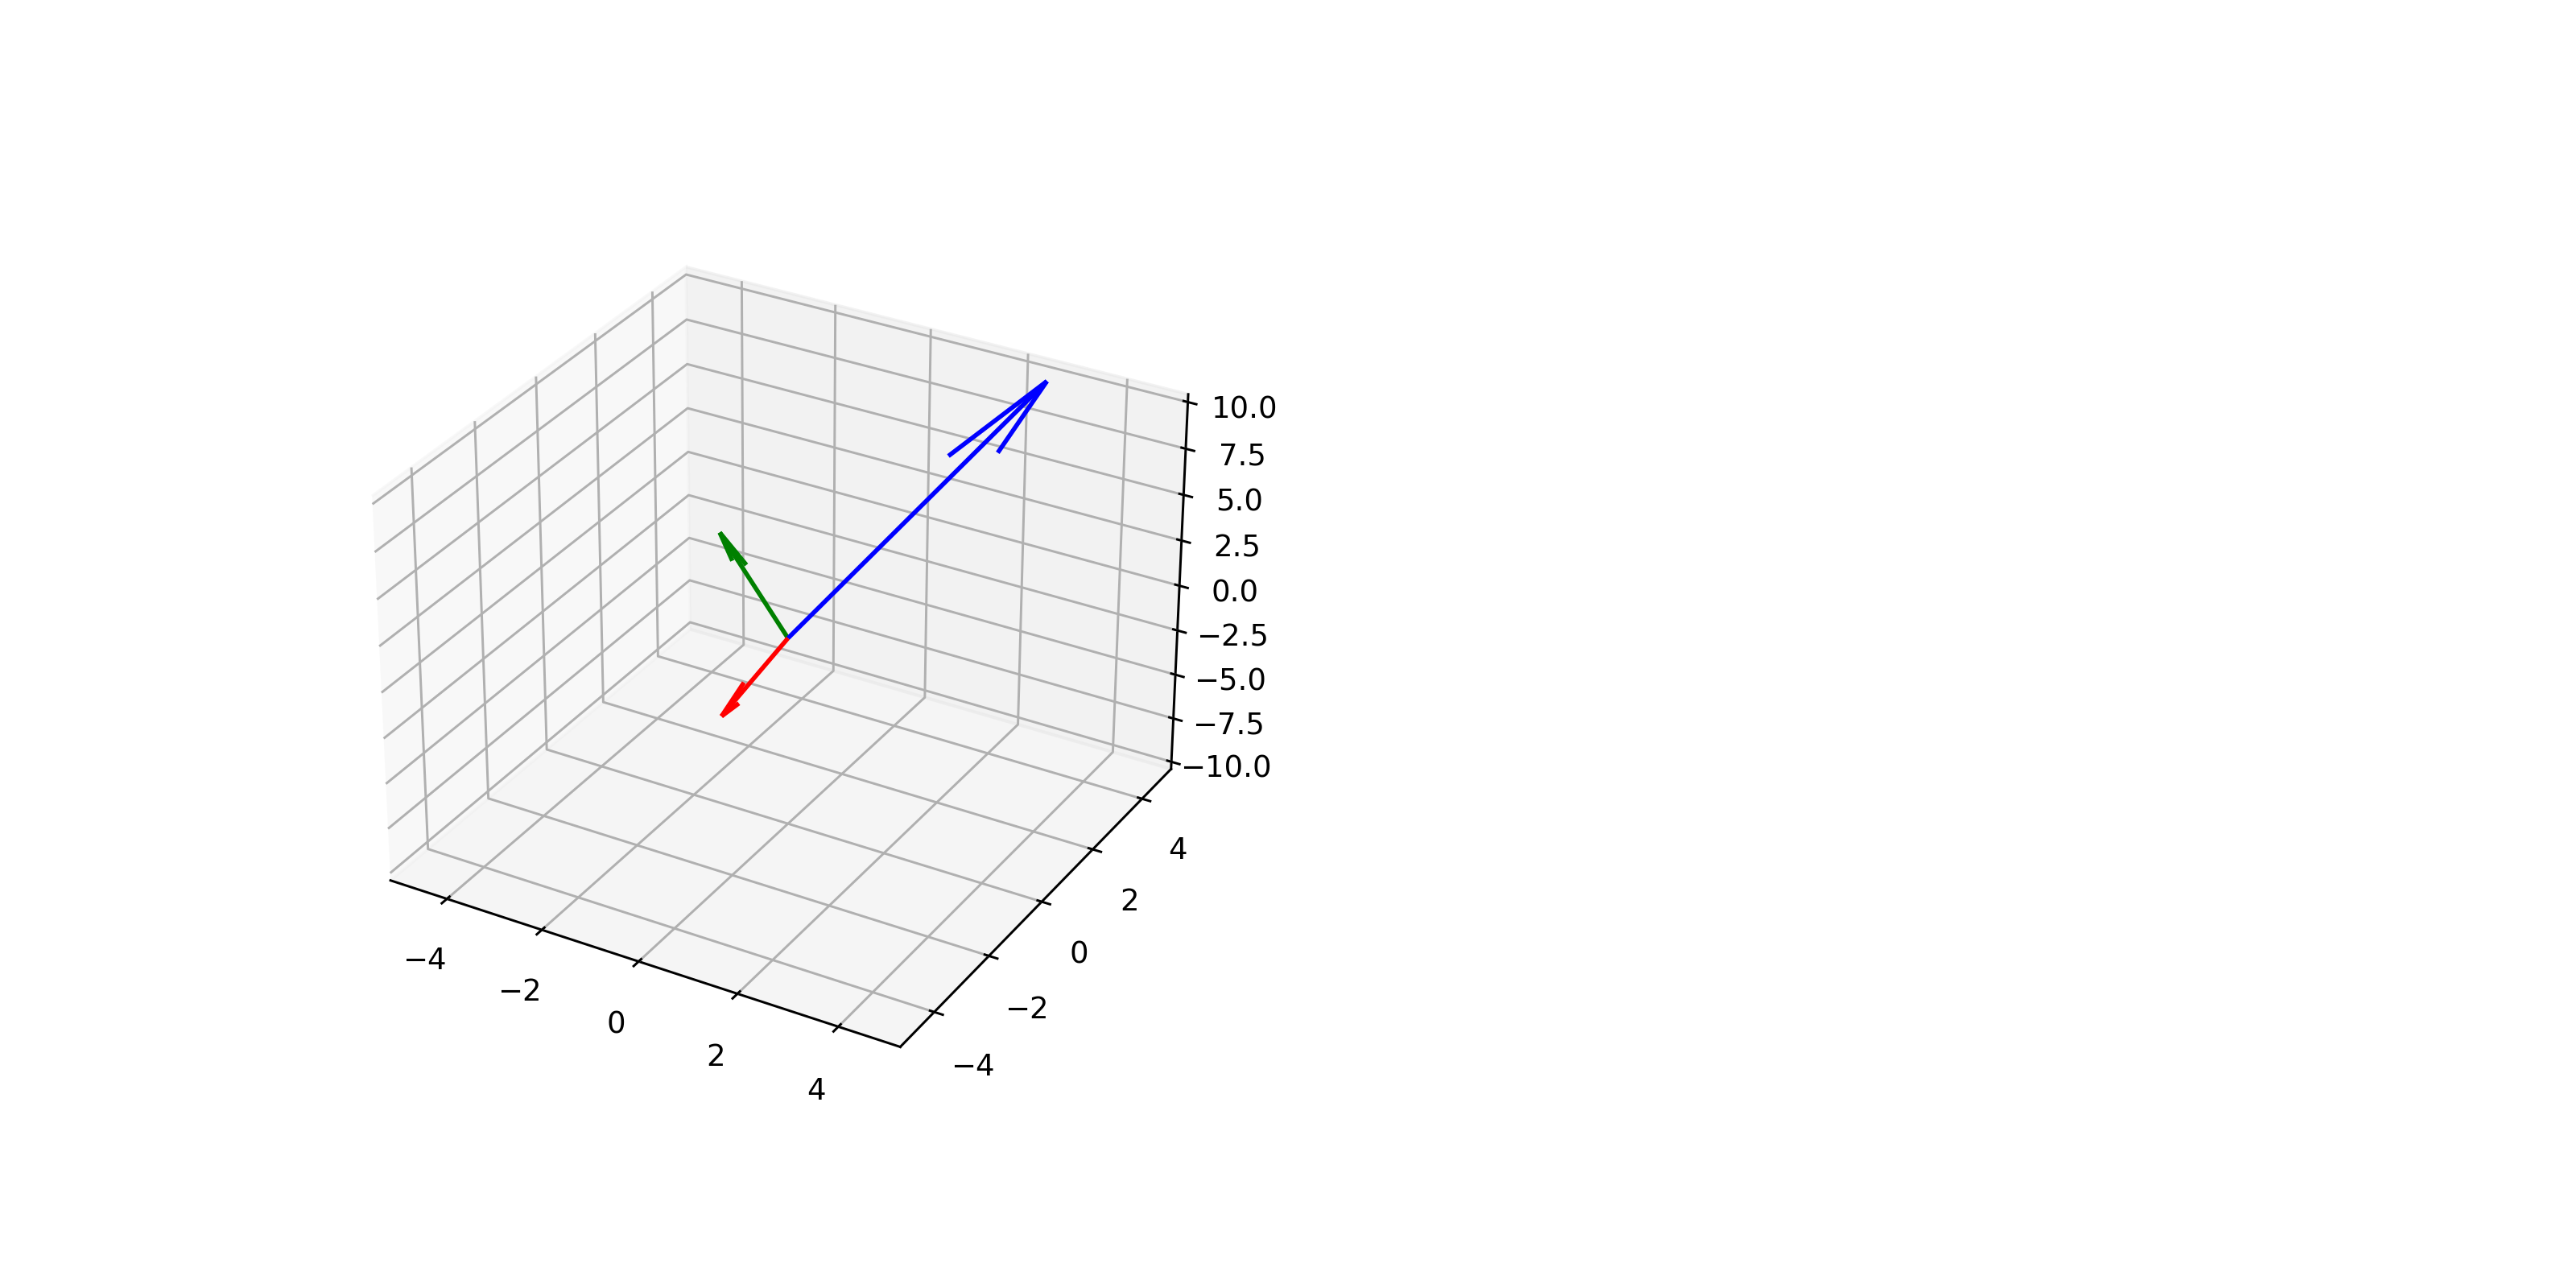

In [2]:

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')



ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-10,10)
ax.quiver((0,),(0,),(0,),(1,),(-4,),(2,), color='red', length=1)
ax.quiver((0,),(0,),(0,),(-2,),(1,),(3,), color='green', length=1)
ax.quiver((0,),(0,),(0,),(2,),(6,),(8,), color='blue', length=1)

plt.show()


<IPython.core.display.Javascript object>


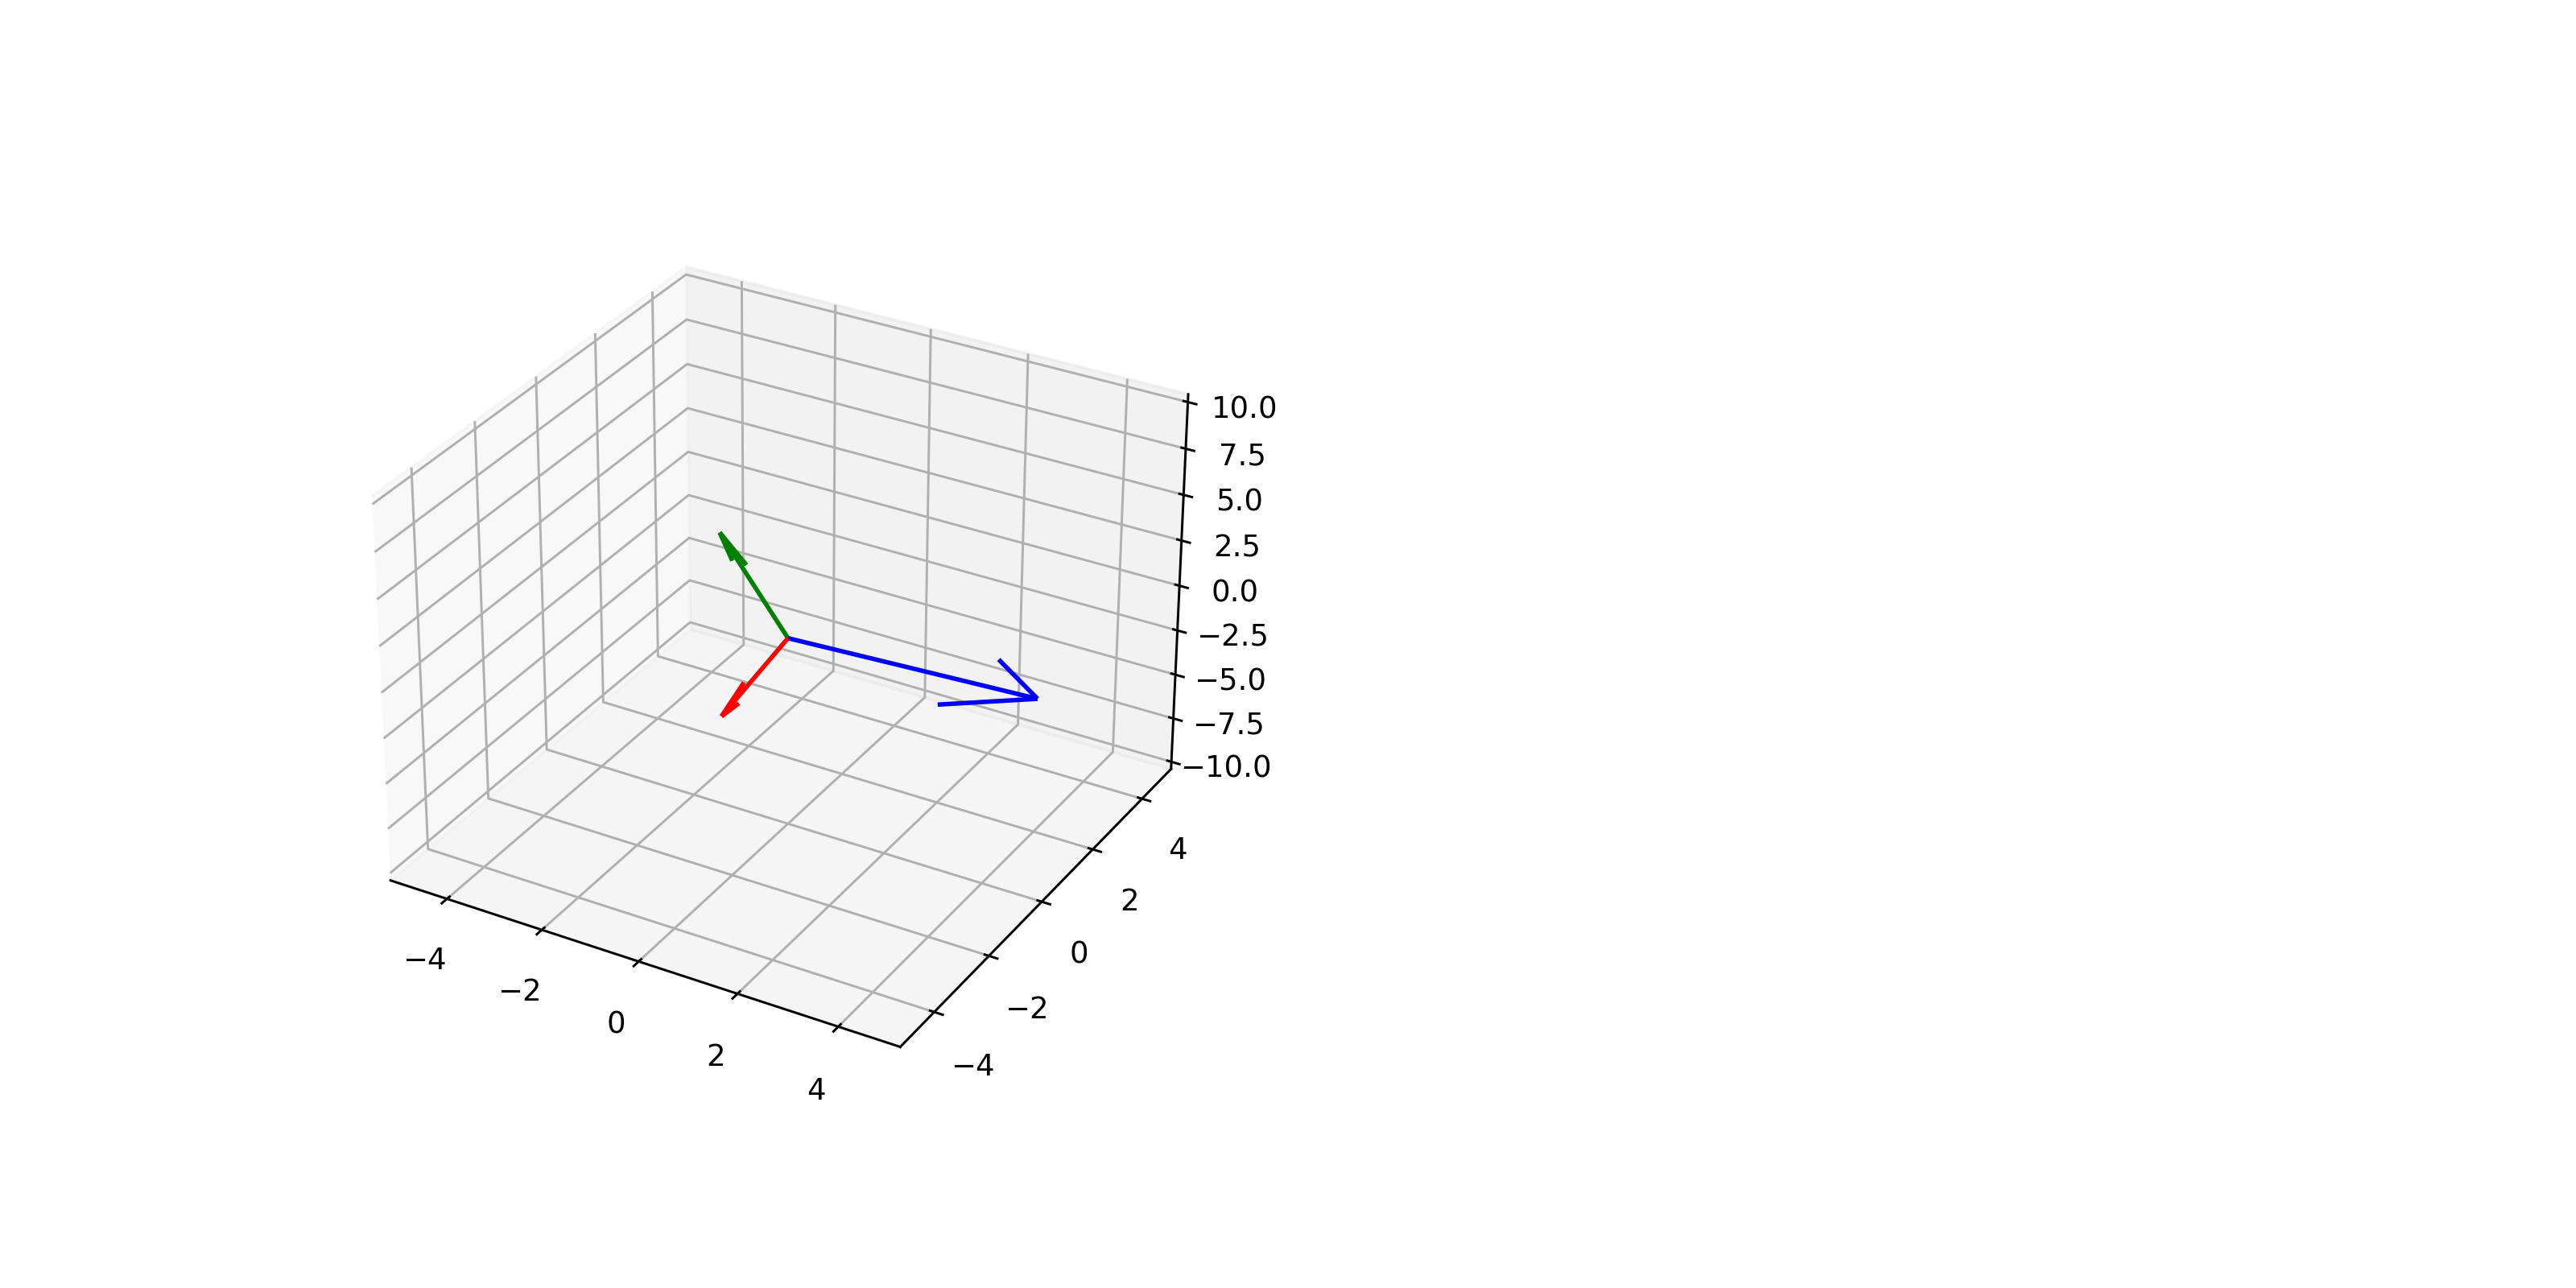

In [3]:

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')



ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-10,10)
ax.quiver((0,),(0,),(0,),(1,),(-4,),(2,), color='red', length=1)
ax.quiver((0,),(0,),(0,),(-2,),(1,),(3,), color='green', length=1)
ax.quiver((0,),(0,),(0,),(2,),(6,),(-10,), color='blue', length=1)

plt.show()


- the invertable matrix has rank 3
- the non-invertable matrix has rank 2

### Fact: 

The rank of a matrix equals the number of pivots in its row echelon form, which is equal to the number of pivots in its reduced row echelon form.

- rank-3 matrix:

$$
\begin{aligned}
A &= 
\begin{bmatrix}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & 8
\end{bmatrix}
\end{aligned}
$$

- row echelon form:

$$
\left[\begin{array}{r}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & 8
\end{array}\right]\\
\left[\begin{array}{r}
1 & -4 & 2\\
0 & -7 & 7\\
0 & 14 & 4
\end{array}\right]\\
\left[\begin{array}{r}
1 & -4 & 2\\
0 & -7 & 7\\
0 & 0 & 28
\end{array}\right]\\
$$

The row echelon form has 3 pivots, so $A$ has rank 3.




$$
\left[\begin{array}{r}
1 & -4 & 0\\
0 & -7 &0\\
0 & 0 & 28
\end{array}\right]\\
\left[\begin{array}{r}
1 & 0 & 0\\
0 & -7 &0\\
0 & 0 & 28
\end{array}\right]\\
\left[\begin{array}{r}
1 & 0 & 0\\
0 & 1 &0\\
0 & 0 & 1
\end{array}\right]\\
$$

The reduced row echolon form also has 3 pivots.
(For an invertable matrix, the reduced row echelon form is always the identity matrix.)

- rank-2 matrix

$$
\begin{aligned}
B &= 
\begin{bmatrix}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & -10
\end{bmatrix}\\[1em]
\end{aligned}
$$

- row-echelon form

$$
\begin{bmatrix}
1 & -4 & 2\\
0 & -7 & 7\\
0 & 14 & -14
\end{bmatrix}\\[1em]
\begin{bmatrix}
1 & -4 & 2\\
0 & -7 & 7\\
0 & 0 & 0
\end{bmatrix}\\[1em]
$$

The row echelon form has two pivots, hence $B$ has rank 2.


- reduced row echelon form


$$
\begin{bmatrix}
1 & 0 & -2\\
0 & -7 & 7\\
0 & 0 & 0
\end{bmatrix}\\[1em]
\begin{bmatrix}
1 & 0 & -2\\
0 & 1 & -1\\
0 & 0 & 0
\end{bmatrix}\\[1em]
$$

The reduced row echelon form also has 2 pivots.

## Dimensionality of a vector space

### Linear independence of vectors

- a vector $\mathbf b$ is independent from a set of vectors $\mathbf a_1, \ldots, \mathbf a_n$ if and only if there are no real numbers $x_1,\ldots,x_n$ such that

$$
x_1\mathbf a_1 + \cdots + x_n\mathbf a_n = \mathbf b
$$

- a set of vectors $\mathbf a_1, \ldots, \mathbf a_n$ is linearly independent if and only if each $\mathbf a_i$ is linearly independent of the other vectors $\mathbf a_1,\ldots, \mathbf a_{i-1},\mathbf a_{i+1}, \ldots \mathbf a_n$.

Equivalently, the column vectors of a matrix $A$ are linearly independent if and only if the linear system

$$
A\mathbf x = \mathbf 0
$$

has as its only solution $\mathbf x = \mathbf 0$.

(Independence is important, e.g., for linear regression.)

#### Examples

- $\begin{bmatrix}1\\ 0\end{bmatrix}$ and $\begin{bmatrix}0\\ 1\end{bmatrix}$: dependent or independent?


- $\begin{bmatrix}1\\ 0\end{bmatrix}$ and $\begin{bmatrix}0\\ 0.00001\end{bmatrix}$: dependent or independent?


- $\begin{bmatrix}1\\ 1\end{bmatrix}$ and $\begin{bmatrix}-1\\ -1\end{bmatrix}$: dependent or independent?


- $\begin{bmatrix}1\\ 1\end{bmatrix}$ and $\begin{bmatrix}0\\ 0\end{bmatrix}$: dependent or independent?


- $\begin{bmatrix}a\\ b\end{bmatrix}, \begin{bmatrix}c\\ d\end{bmatrix}$ and $\begin{bmatrix}e\\ f\end{bmatrix}$: dependent or independent?



In [4]:
A = Matrix([
    [1,0,3],
    [2,1,5],
    [1,0,3]
])
A

Matrix([
[1, 0, 3],
[2, 1, 5],
[1, 0, 3]])

- are the columns dependent or independent?
- what is the rank of $A$?

In [5]:
A.nullspace()[0]

Matrix([
[-3],
[ 1],
[ 1]])

**A little puzzle**

A rectangular $m\times n$ matrix with $m<n$ cannot have independent columns. Why?

**Example**

In [6]:
B = Matrix([
    [1,0,1,5],
    [0,1,1,-3],
    [2,1,-1,-2]
])
B

Matrix([
[1, 0,  1,  5],
[0, 1,  1, -3],
[2, 1, -1, -2]])

In [7]:
B.rref()[0]

Matrix([
[1, 0, 0,  11/4],
[0, 1, 0, -21/4],
[0, 0, 1,   9/4]])

### Basis of a vector space

- the **span** of a set of vectors $\mathbf a_1,\ldots, \mathbf a_n$ is the set of their linear combinations, i.e., the set

$$
    \{x_1\mathbf a_1 + \cdots x_n\mathbf a_n|x_1,\ldots, x_n \in \mathbb R\}
$$

- the span of a set of vectors is a vector space

- a set of vectors $\mathbf a_1, \ldots, \mathbf a_n$ is a **basis of a vector space $S$** if and only if
    - $\mathbf a_1, \ldots, \mathbf a_n$ are linearly independent, and
    - the span of $\mathbf a_1, \ldots, \mathbf a_n$ is $S$.



What is the span of

- $\mathbf v_1 = \begin{bmatrix}1\\0\end{bmatrix}$ and $\mathbf v_2 = \begin{bmatrix}0\\1\end{bmatrix}$,


- $\mathbf v_1 = \begin{bmatrix}1\\0\end{bmatrix}, \mathbf v_2 = \begin{bmatrix}0\\1\end{bmatrix}$, and $\mathbf v_3 = \begin{bmatrix}4\\7\end{bmatrix}$,


- $\mathbf w_1 = \begin{bmatrix}1\\1\end{bmatrix}$ and $\mathbf w_2 = \begin{bmatrix} -1\\-1\end{bmatrix}$?

Which of these sets of vectors form a basis?

### Theorem

If the columns of $A$ and the columns of $B$ are both a basis for some vector space $S$, then $A$ and $B$ have the same number of columns.

#### Proof

Let $A$ be an $m\times n$ matrix and $B$ and $m\times k$ matrix. Suppose $k<n$

Since $B$ is a basis of the column space of $A$, there must be a solution $\mathbf x_i$
$$
B\mathbf x_i = \mathbf a_i 
$$

for each column vector $\mathbf a_i$ of $A$. Let 

$$
X = \begin{bmatrix}
\vdots & \cdots & \vdots\\
\mathbf x_1 & \cdots & \mathbf x_n\\
\vdots & \cdots & \vdots\\
\end{bmatrix}
$$
i.e., $X$ is the matrix with $\mathbf x_1,\ldots, \mathbf x_n$ as column vectors. It has the format $k\times n$.





Then it holds:

$$
A = BX
$$

Since $k<n$, $X$ is broader than high. Therefore its reduced row-echolon form must have free columns. Therefore there must be a non-zero solution $\mathbf y$ for 

$$
X\mathbf y = \mathbf 0
$$

It follows immediately that

$$
\begin{aligned}
X\mathbf y &= \mathbf 0\\
BX\mathbf y &= \mathbf 0\\
A\mathbf y &= \mathbf 0
\end{aligned}
$$

This is a contradiction, since by assumption, the columns of $A$ are linearly independent. 

$\dashv$

### Dimensions of a vector space

It follows that each basis of a vector space $S$ has the same number of vectors as elements. We call this number the **number of dimensions of $S$**.






Let us re-consider the invertible matrix from earlier:

$$
\begin{aligned}
A &= 
\left[
\begin{array}{r}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & 8
\end{array}\right]\\[1em]
A^{-1} &=
\left[\begin{array}{r}
\frac{5}{63} & - \frac{22}{63} & \frac{1}{9}\\- \frac{11}{63} & - \frac{2}{63} & \frac{1}{18}\\\frac{1}{9} & \frac{1}{9} & \frac{1}{18}
\end{array}\right]
\end{aligned}
$$

Solving $A\mathbf x = \mathbf 0$:


$$
\begin{aligned}
A\mathbf x &= \mathbf 0\\
A^{-1}A\mathbf x &= A^{-1}\mathbf 0\\
\mathbf x &= \mathbf 0
\end{aligned}
$$


So the columns of $A$ are independent (as are the columns of each invertible matrix). Let $\mathbf b$ be some arbitrary vector in $\mathbb R^3$.
$$
\begin{aligned}
A\mathbf x &= \mathbf b\\
\mathbf x &= A^{-1}\mathbf b\\
\end{aligned}
$$
This means that for each vector $\mathbf b$ in $\mathbb R^3$, we can find coefficients $x_1, x_2, x_3$ such that $\mathbf b = x_1\mathbf a_1 + x_2 \mathbf a_2 + x_3\mathbf a_3$. The columns of $A$ therefore are a basis for $\mathbb R^3$.

By an analogous argument, it follows that

**The columns of an invertible $n\times n$ matrix form a basis for $\mathbb R^n$**.

# The four subspaces of a matrix

So far we have looked at two subspaces of an $n\times m$ matrix $A$:

- the **column space** $C(A)$
- the **nullspace** $N(A)$

The transpose $A^T$ also has these two subspaces:

- the column space $C(A^T)$ is called the **row space of $A$**
- the null space $N(A^T)$ is called the **left nullspace of $A$**

What can we say about the number of dimensions of these four subspaces?

- dimensions of $C(A), N(A^T) \leq n$
- dimensions of $C(A^T), N(A) \leq m$

We want to do better than that!

### Subspaces of reduced row echelon form matrices

Let us start with matrices in reduced row echelon form. 

Example:

$$
R = \left[\begin{array}{r}
1 & 2 & 0 & -2& 0\\
0 & 0 & 1 & -1& 3\\
0 & 0 & 0 & 0 & 0
\end{array}\right]
$$

- columns $\mathbf r_1$ an $\mathbf r_3$ are pivot columns
- columns $\mathbf r_2, \mathbf r_4$ and $\mathbf r_5$ are free columns

**Observation**: The pivot columns form a basis for $C(R)$.

$$
\begin{aligned}
\mathbf r_2 &= 2\mathbf r_1\\
\mathbf r_4 &= -2\mathbf r_1-\mathbf r_3\\
\mathbf r_5 &=  3\mathbf r_3
\end{aligned}
$$

Remember that the *rank of $R$* is the number of pivot columns. Hence the rank of $R$ is the number of dimensions of the column space. In the example, this number is 2.

(Here this is only demonstrated with a single example, but the argument works for any matrix in reduced row echelon form.)

There is one special solution to $R\mathbf x = \mathbf 0$ for each free column of $R$:

$$
\begin{aligned}
\mathbf x_1 &= \left[\begin{array}{r}-2\\1\\0\\0\\0\end{array}\right]&
\mathbf x_2 &= \left[\begin{array}{r}2\\0\\1\\1\\0\end{array}\right]&
\mathbf x_2 &= \left[\begin{array}{r}0\\0\\-3\\0\\1\end{array}\right]
\end{aligned}
$$




With *sympy*:

In [8]:
R = Matrix([
    [1,2,0,-2,0],
    [0,0,1,-1,3],
    [0,0,0,0,0]
])
R

Matrix([
[1, 2, 0, -2, 0],
[0, 0, 1, -1, 3],
[0, 0, 0,  0, 0]])

In [9]:
x1, x2, x3 = R.nullspace()

In [10]:
x1

Matrix([
[-2],
[ 1],
[ 0],
[ 0],
[ 0]])

In [11]:
x2

Matrix([
[2],
[0],
[1],
[1],
[0]])

In [12]:
x3

Matrix([
[ 0],
[ 0],
[-3],
[ 0],
[ 1]])

Collecting them in a matrix:

$$
X = \left[\begin{array}{r}
-2 & 2 & 0\\
1 & 0 & 0\\
0 & 1 & -3\\
0 & 1 & 0\\
0 & 0 & 1
\end{array}\right]
$$

Now consider the system

$$
X\mathbf z = \mathbf 0
$$

Solving via substitution, this gives

$$
\begin{aligned}
-2z_1 + 2 z_2 &= 0\\
z_1 &= 0\\
z_2-3z_3 &= 0\\
z_2 &= 0\\
z_3 &= 0
\end{aligned}
$$

Therefore $\mathbf z = \mathbf 0$. The columns of $X$ are linearly independent, so they are a basis for $N(R)$.

There are as many columns in $X$ as there are free columns in $R$. If $r$ is the rank of $R$, there are $r$ pivot columns and $n-r$ free columns.

**The nullspace $N(R)$ has $n-r$ dimensions.**

## Dimensions of the row space of $R$

Now let us focus on the row space of $R$, which is the column space of 

$$
R^T = \left[\begin{array}{r}
1 & 0 & 0\\
2 & 0 & 0\\
0 & 1 & 0\\
-2 & -1 & 0\\
0 & 3 & 0
\end{array}\right]
$$

By the construction of reduced row echelon forms, each row of $R$, i.e. each column of $R^T$, either contains a pivot or it is all-zero. By the same argument, each pivot row of $R^T$ contains a $1$ in one column and $0$ in all other columns, and all pivot columns are different.

Two oberservations follow from this:

- The pivot columns are linearly independent.
- The pivot columns form a basis of $C(R^T)$.

Since the number of pivot columns equals $r$, the rank of $R$, **the row space of $R$ has $r$ dimensions**.


When we bring $R^T$ in reduced row echelon form, pivot columns remain pivot columns:


$$
\begin{aligned}
R^T &= \left[\begin{array}{r}
1 & 0 & 0\\
2 & 0 & 0\\
0 & 1 & 0\\
-2 & -1 & 0\\
0 & 3 & 0
\end{array}\right]\\
\mathrm{rref}(R^T) &= \left[\begin{array}{r}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}\right]
\end{aligned}
$$

Hence the number of dimensions of $N(R^T)$, the left nullspace of $R$, is $m-r$.


### Generalizing to all matrices

We found that for an $m\times n$ matrix $R$ in reduced row echelon form with rank $r$:

- the row space of $R$ and the column space of $R$ both have $r$ dimensions
- the null space of $R$ has $n-r$ dimensions
- the left null space of $R$ has $m-r$ dimensions

Next it will be shown that this holds not just for matrices in reduced row echelon form, but for all matrices $m\times n$ matrices.

**Theorem**
If $A$ is invertible, then for all $B$, $C(B)$ and $C(AB)$ have the same number of dimensions.

*Proof*

Let $B$ be an $m\times n$-matrix. If $r$ is the number of dimensions of $B$, then there is an $m\times r$-matrix $M$ with independent columns, and an $r\times n$-matrix $X$ such that

$$
MX = B.
$$
It follows that the columns of $AM$ are also independent. Suppose otherwise. Then there is an $x$ with
$$
AMx = \mathbf 0.
$$
But then we would have
$$
\begin{align}
A^{-1}AMx &= A^{-1}\mathbf 0\\
Mx &= \mathbf 0.
\end{align}
$$
This contradicts the assumption that the columns of $M$ are independent. So the columns of $AM$ form a basis for $AB$. Hence the column space of $AB$ has $r$ dimensions as well.

$\dashv$


**Theorem**
If $A$ is invertible, then for all $B$, $C(B)$ and $C(BA)$ have the same number of dimensions.

*Proof*

Let $\mathbf b \in C(B)$. Then there is an $x$ such that $Bx = \mathbf b$. It follows that $BAA^{-1}x=\mathbf b$, so $\mathbf b\in C(BA)$.

Conversely, if $\mathbf b\in C(BA)$. Then there is an $x$ such that $BAx=\mathbf b$. It follows directly that $\mathbf b\in C(B)$. 

So $C(B) = C(BA)$, so they have the same number of dimensions.

$\dashv$

**Theorem**
If A is invertible, then $N(B)$ and $N(AB)$ have the same number of dimensions.

*Proof*

Let $x\in N(B)$. Then $Bx=\mathbf 0$. Therefore $ABx=\mathbf 0$, so $x\in N(AB)$.

Conversely, let $x\in N(AB)$. Then $ABx=\mathbf 0$, hence

$$
\begin{align}
ABx &= \mathbf 0\\
A^{-1}ABx &= A^{-1}\mathbf 0\\
Bx &= 0
\end{align}
$$

So $N(B) = N(AB)$ and they have the same number of dimensions.

$\dashv$

**Theorem**
If A is invertible, then $N(B)$ and $N(BA)$ have the same number of dimensions.

*Proof*

Let the columns of $X$ be a basis for $N(B)$. Then the columns of $X$ are independent, and $BX=\mathbf 0$. Then $BAA^{-1}X = \mathbf 0$. According to the previous theorem, $A^{-1}X$ has the same number of dimensions as $X$, so $A^{-1}X$ is a basis for $N(BA)$ with the same number of dimension.


### Consequences

- Transforming a matrix $A$ to $\text{rref}(A)$ or to $\text{rref}(A^T)$ only involves multiplication with invertible matrices.
- None of these operations changes the dimensionalities of $C(A)$, $N(A)$, $C(A^T)$ or $N(A^T)$.
- The results from above for reduced row echelon forms carry over to all matrices.


### Summary

Let $A$ be an $m\times n$ matrix.

- The column space $C(A)$ and the row space $C(A^T)$ both have $r$ dimensions (the rank of $A$).
- The nullspace $N(A)$ has $n-r$ dimensions.
- The left nullspace $N(A^T)$ has $m-r$ dimensions. 


<img src="_img/subspaces.svg"  width="1000" style="display: block; margin-left: auto; margin-right: auto;">